## Step 1: Importing Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing important libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd,numpy as np

In [3]:
# Importing dataset
user_app_df = pd.read_csv("User+App+Behaviour.csv")
user_app_df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


## Step 2: Inspecting the Dataframe

In [4]:
# Let's check the dimensions of the dataframe
user_app_df.shape

(5630, 20)

In [5]:
# Let's see the type of each column
user_app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## Step 3: Data Preparation (Data Cleaning and Treatment)¶

In [6]:
# Mising Data Percentage 
round(100*(user_app_df.isnull().sum())/len(user_app_df), 2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

In [7]:
# Prepare list of Missing value coulmns
missing_colms = user_app_df.columns[user_app_df.isnull().any()].tolist()
missing_colms

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder']

In [8]:
# Calculate the Mean for each feature
means_colms = user_app_df.mean()

In [9]:
# Replace Missing Values with Mean
user_app_df[missing_colms] =user_app_df[missing_colms].fillna(means_colms)

In [10]:
# Verify Mising Data Percentage 
round(100*(user_app_df.isnull().sum())/len(user_app_df), 2)

CustomerID                     0.0
Churn                          0.0
Tenure                         0.0
PreferredLoginDevice           0.0
CityTier                       0.0
WarehouseToHome                0.0
PreferredPaymentMode           0.0
Gender                         0.0
HourSpendOnApp                 0.0
NumberOfDeviceRegistered       0.0
PreferedOrderCat               0.0
SatisfactionScore              0.0
MaritalStatus                  0.0
NumberOfAddress                0.0
Complain                       0.0
OrderAmountHikeFromlastYear    0.0
CouponUsed                     0.0
OrderCount                     0.0
DaySinceLastOrder              0.0
CashbackAmount                 0.0
dtype: float64

In [11]:
# let's find if we have duplicate rows.
user_app_df.duplicated().sum()


0

In [12]:
# column "CustomerID" is just indicative of the ID number of the Cusomers hence can be dropped.

user_app_df.drop(["CustomerID"], 1, inplace = True)

### Outlier treatment:

In [13]:
##Continuous features
cont_cols= [i for i in user_app_df.columns if i not in ['Churn', 'CityTier','SatisfactionScore','PreferredLoginDevice','PreferredPaymentMode','MaritalStatus', 'Complain','Gender','PreferedOrderCat' ]]
cont_cols

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [14]:
user_app_df[cont_cols].describe(percentiles= [0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999])


,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000,5630.000000
mean,10.189899,15.639896,2.931535,3.688988,4.214032,15.707922,1.751023,3.008004,4.543491,177.221492
std,8.354164,8.339095,0.705384,1.023999,2.583586,3.587926,1.851038,2.871521,3.553382,49.193869
min,0.000000,5.000000,0.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,0.000000
1%,0.000000,6.000000,2.000000,1.000000,1.000000,11.000000,0.000000,1.000000,0.000000,116.000000
10%,1.000000,7.000000,2.000000,3.000000,2.000000,12.000000,0.000000,1.000000,1.000000,127.000000
25%,3.000000,9.000000,2.000000,3.000000,2.000000,13.000000,1.000000,1.000000,2.000000,146.000000
50%,9.000000,14.000000,3.000000,4.000000,3.000000,15.000000,1.000000,2.000000,4.000000,163.000000
75%,15.000000,20.000000,3.000000,4.000000,6.000000,18.000000,2.000000,3.008004,7.000000,196.000000
90%,23.000000,30.000000,4.000000,5.000000,8.000000,21.000000,4.000000,7.000000,9.000000,260.000000


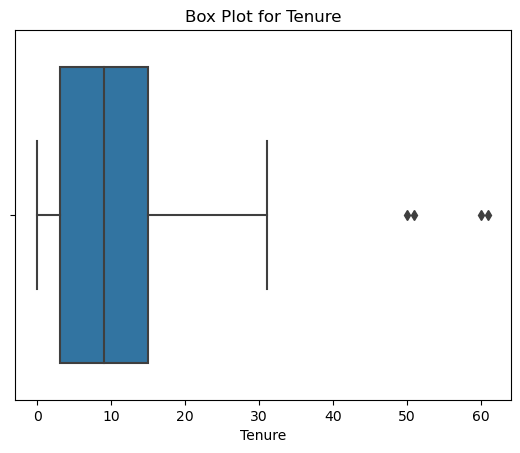

In [15]:
sns.boxplot(x='Tenure', data=user_app_df)
plt.xlabel('Tenure')
plt.title('Box Plot for Tenure')
plt.show()

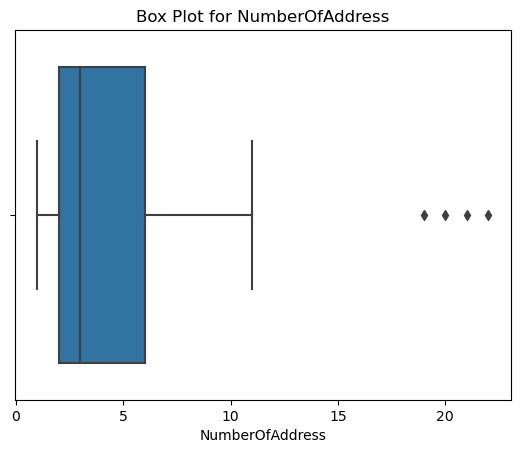

In [16]:
sns.boxplot(x='NumberOfAddress', data=user_app_df)
plt.xlabel('NumberOfAddress')
plt.title('Box Plot for NumberOfAddress')
plt.show()

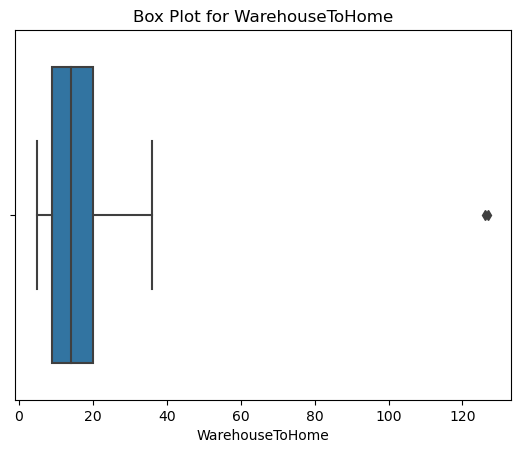

In [17]:
sns.boxplot(x='WarehouseToHome', data=user_app_df)
plt.xlabel('WarehouseToHome')
plt.title('Box Plot for WarehouseToHome')
plt.show()

In [18]:
## Removing outliersin between 1 and 99.9 percentiles
for col in cont_cols: 
    q1 = user_app_df[col].quantile(0.010)
    q3 = user_app_df[col].quantile(0.999)
    iqr = q3-q1
    range_lower  = q1-1.5*iqr
    range_upper = q3+1.5*iqr
    # Assigning the filtered dataset into data
user_app_df = user_app_df.loc[(user_app_df[col] > range_lower) & (user_app_df[col] < range_upper)]
 

In [19]:
 user_app_df.shape

(5630, 19)

In [20]:
user_app_df['Tenure'] = user_app_df['Tenure'].round(1)

In [21]:
user_app_df['tenure_yr'] = round(user_app_df['Tenure']/12, 1)

print(user_app_df.tenure_yr.value_counts())
print("Min:",user_app_df.tenure_yr.min())
print("Max:",user_app_df.tenure_yr.max())

0.8    724
0.1    690
0.0    508
0.2    362
1.2    335
0.7    263
0.6    221
0.4    204
0.3    203
0.9    194
0.5    183
1.0    182
1.1    181
1.8    160
1.3    149
1.6    140
2.2    126
1.5    123
1.7    109
1.4    106
1.9     89
2.0     75
2.3     70
2.5     66
2.1     59
2.4     55
2.6     49
4.2      2
5.0      1
5.1      1
Name: tenure_yr, dtype: int64
Min: 0.0
Max: 5.1


In [22]:
bins_tenure = [0, 1, 2, 4, 5, 6]
label_tenure = ['0_1_Yr', '1_2_Yr', '2_4_Yr', '4_5_Yr', '5_6_Yr']

user_app_df['Tenure'] = pd.cut(user_app_df['tenure_yr'], bins=bins_tenure, labels=label_tenure, right=False)
user_app_df.drop(columns='tenure_yr', inplace=True)


In [23]:
user_app_df.Tenure.value_counts()

0_1_Yr    3552
1_2_Yr    1574
2_4_Yr     500
4_5_Yr       2
5_6_Yr       2
Name: Tenure, dtype: int64

In [24]:
user_app_df.head(10)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,0_1_Yr,Mobile Phone,3,6.0,Debit Card,Female,3.000000,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,0_1_Yr,Phone,1,8.0,UPI,Male,3.000000,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,0_1_Yr,Phone,1,30.0,Debit Card,Male,2.000000,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0_1_Yr,Phone,3,15.0,Debit Card,Male,2.000000,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0_1_Yr,Phone,1,12.0,CC,Male,2.931535,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
5,1,0_1_Yr,Computer,1,22.0,Debit Card,Female,3.000000,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139
6,1,0_1_Yr,Phone,3,11.0,Cash on Delivery,Male,2.000000,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,1,0_1_Yr,Phone,1,6.0,CC,Male,3.000000,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
8,1,1_2_Yr,Phone,3,9.0,E wallet,Male,2.931535,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
9,1,0_1_Yr,Phone,1,31.0,Debit Card,Male,2.000000,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123


In [25]:
user_app_df[['Tenure','CityTier']] = user_app_df[['Tenure','CityTier']].astype('object')

In [26]:
user_app_df.describe(include='object')

,Tenure,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630,5630,5630
unique,5,3,3,7,2,6,3
top,0_1_Yr,Mobile Phone,1,Debit Card,Male,Laptop & Accessory,Married
freq,3552,2765,3666,2314,3384,2050,2986


### Inferences:
i. Higher proportion of recently joined customers with '0_1_yr' tenure.    
ii. Most of the customers arefrom CityTier 1.     
iii. Mobile phones are the most commonly used devices for customer login.           
iv. Debit cards are the most commonly used payment mode by customers.     
v. a higher proportion of male customers.      
vi. Customers seem to prefer ordering 'Laptop & Accessory' products more often.    
vii. a higher proportion of married customers.   

## Step 4: EDA

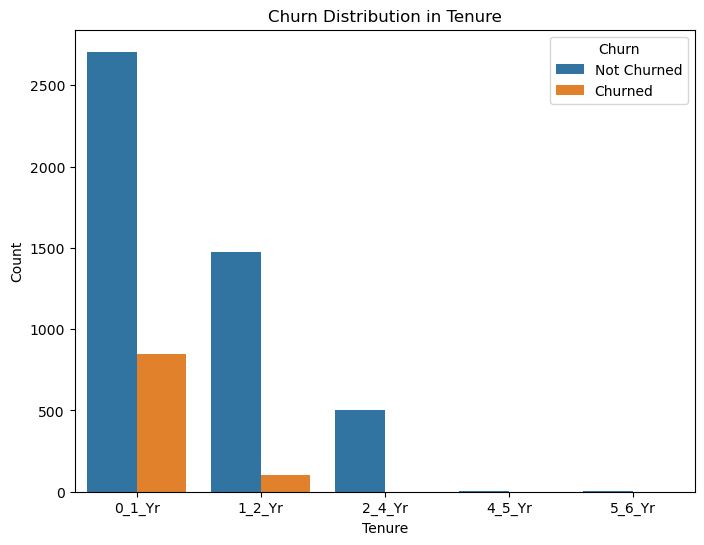

In [27]:
# Churn Distribution in Tenure:
plt.figure(figsize=(8, 6))
sns.countplot(x='Tenure', hue='Churn', data=user_app_df)
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Churn Distribution in Tenure')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

### Inferences:
i. Higher Churn Rate in Early Tenure Bins: 
Customers in the tenure tenure 0 to 2 years are more likely to churn compared to the later tenure bins. This suggests that new customers, especially those in their first year of engagement, have a higher likelihood of churning. It might be indicative of the onboarding experience or early interactions not meeting their expectations or needs.

ii. Decreasing Churn Rate Over Time:
As customers stay with the company longer, the churn rate decreases. After 2 years of tenure only non-churn customers indicates that once customers have remained with the company for at least two years, their likelihood of churning decreases significantly. This could be a positive sign, suggesting that customers become more loyal and satisfied with the services over time.

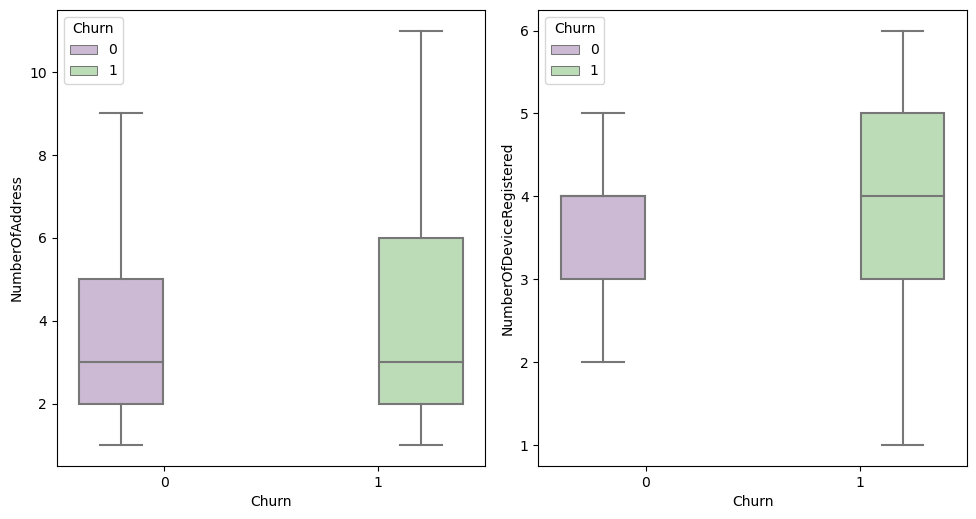

In [28]:
# Plotting boxplots for "NumberOfAddress" and "NumberOfDeviceRegistered"
fig=plt.subplots(figsize=(10,10))

for i,feature in enumerate(["NumberOfAddress", "NumberOfDeviceRegistered"]):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 4.0)
    sns.boxplot(y = feature, x = 'Churn', data = user_app_df, hue="Churn", showfliers= False, palette=("PRGn"))
    plt.tight_layout()

### Inferences:
i. a larger proportion of churned customers have more addresses (higher 'NumberOfAddress') compared to non-churned customers.   
ii.On an average, churned customers tend to have a greater number of registered devices compared to non-churned customers. 

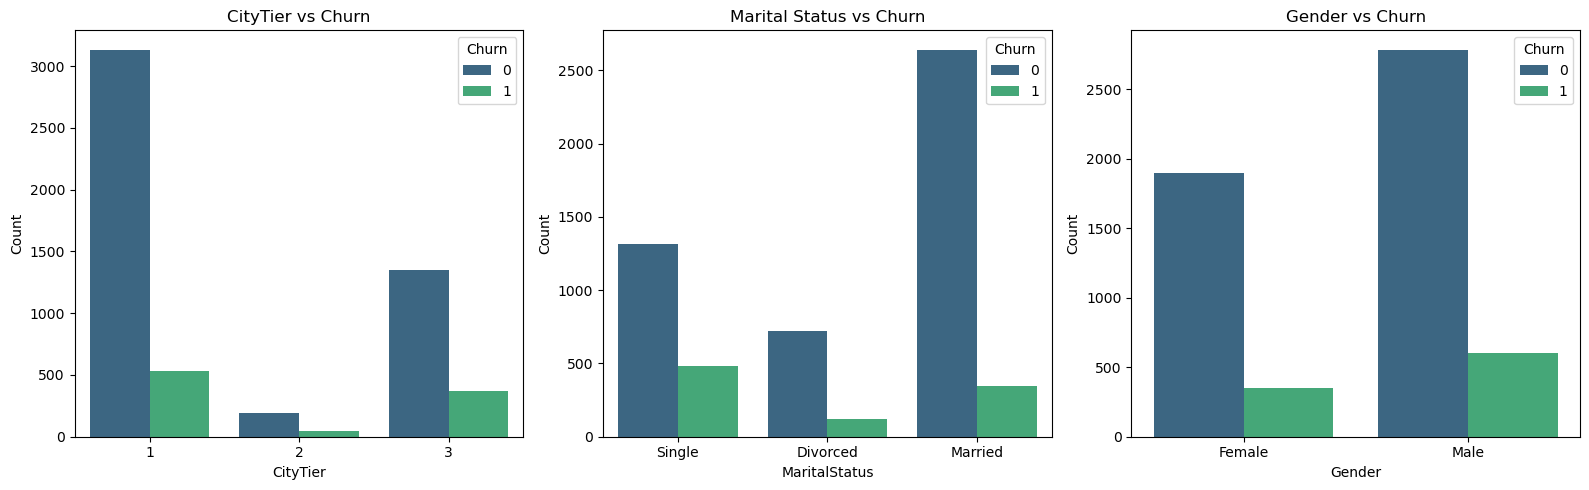

In [29]:
plt.figure(figsize=(16, 5))

# Countplot for CityTier against Churn
plt.subplot(1, 3, 1)
sns.countplot(x='CityTier', hue='Churn', data=user_app_df, palette='viridis')
plt.xlabel('CityTier')
plt.ylabel('Count')
plt.title('CityTier vs Churn')

# Countplot for MaritalStatus against Churn
plt.subplot(1, 3, 2)
sns.countplot(x='MaritalStatus', hue='Churn', data=user_app_df, palette='viridis')
plt.xlabel('MaritalStatus')
plt.ylabel('Count')
plt.title('Marital Status vs Churn')

# Countplot for Gender against Churn
plt.subplot(1, 3, 3)
sns.countplot(x='Gender', hue='Churn', data=user_app_df, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs Churn')

plt.tight_layout()
plt.show()


### Inferences:
i. Customers from CityTier 1 have the lowest probability of churn. They display higher loyalty and are less likely to discontinue using the service or product.   
ii. Among various marital statuses, married customers exhibit the lowest probability of churn.    
iii.Marital status Single have highest probability of churn.          
iv. Male customers show the lowest probability of churn compared to other genders.

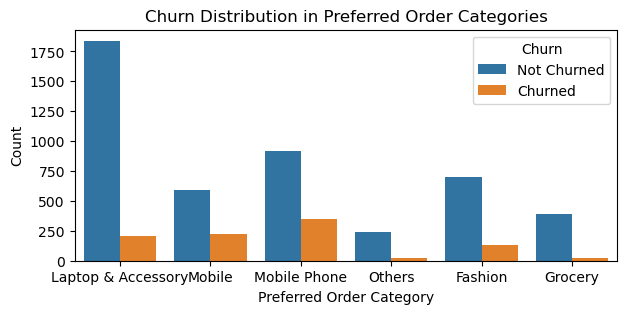

In [30]:
plt.figure(figsize=(7, 3))
sns.countplot(x='PreferedOrderCat', hue='Churn', data=user_app_df)
plt.xlabel('Preferred Order Category')
plt.ylabel('Count')
plt.title('Churn Distribution in Preferred Order Categories')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

### Inference:
Based on the visualization, it appears that the churn count is higher in the "Mobile" and "Mobile Phone" categories. 
This suggests that customers who have chosen these categories as their preferred order category are more likely to churn compared to other categories.Address any issues related to product defects or performance that may be leading to customer dissatisfaction.

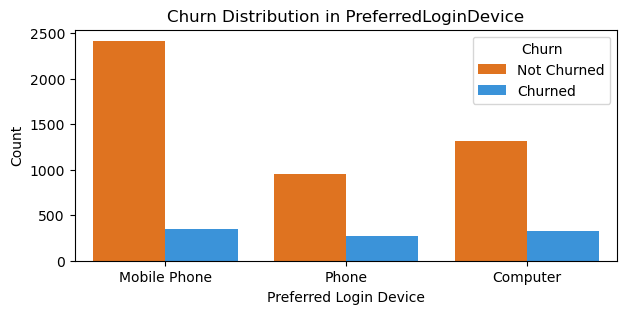

In [31]:
plt.figure(figsize=(7, 3))
sns.countplot(x='PreferredLoginDevice', hue='Churn', data=user_app_df,palette=['#FF6F00', '#2196F3'])
plt.xlabel('Preferred Login Device')
plt.ylabel('Count')
plt.title('Churn Distribution in PreferredLoginDevice')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.show()

### Inference:
Customers who prefer to use "Computer" and "Phone" for their login may have a higher churn rate compared to those using "Mobile Phone." This suggests that the choice of login device might influence their overall satisfaction and engagement with the service.

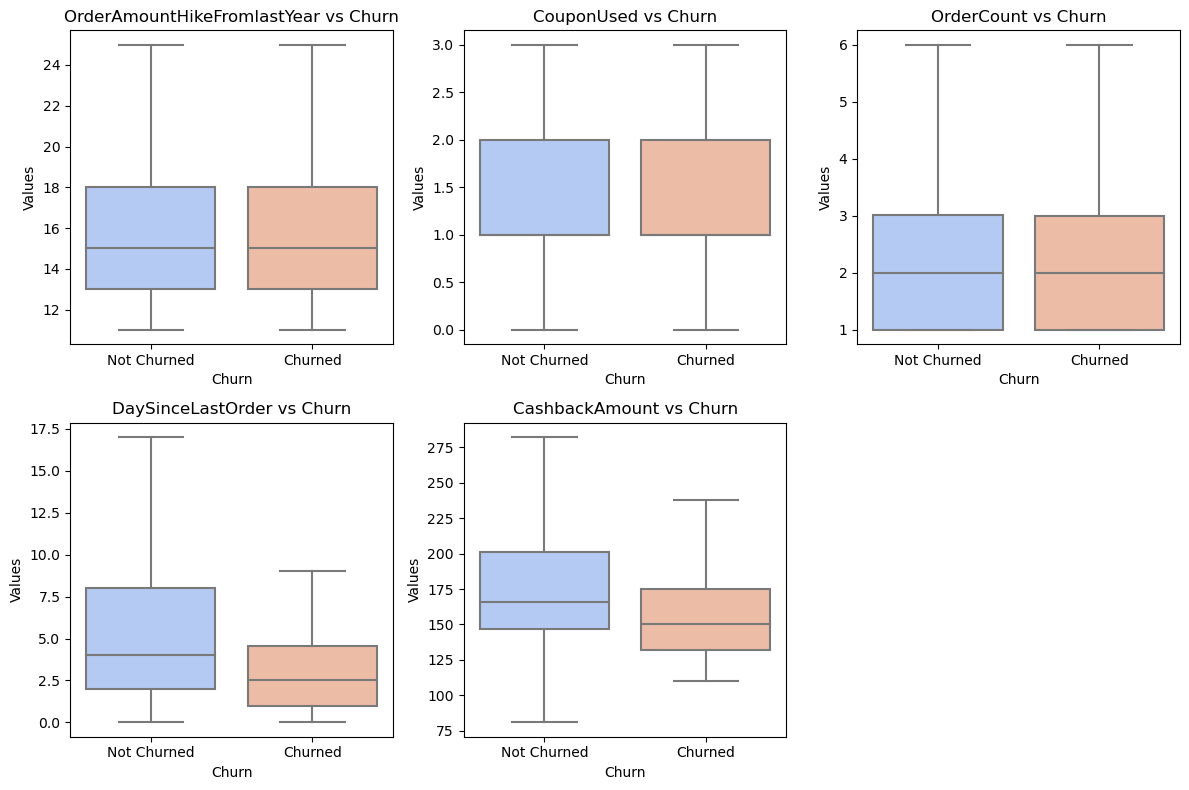

In [32]:
# Selecting continuous features and churn from the DataFrame
cont_features = ['OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

# Create box plots for each continuous feature against churn
plt.figure(figsize=(12, 8))
for i, feature in enumerate(cont_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Churn', y=feature, data=user_app_df, palette='coolwarm',showfliers=False)
    plt.xlabel('Churn')
    plt.ylabel('Values')
    plt.title(f'{feature} vs Churn')
    plt.xticks(ticks=[0, 1], labels=['Not Churned', 'Churned'])

plt.tight_layout()
plt.show()

### Inferences:
i.on average, the order amount hike from the last year, coupon used and order count are not significantly different between customers who churned and those who did not churn.   
ii.Significant difference in Day since last order of churn and non churn customers.These observations indicate that customers who have not churned tend to make more frequent purchases, while churned customers are either making fewer purchases or are more likely to stop buying from the company soon after their last purchase.   
iii.The median cashback amount received by customers who have not churned is higher compared to the median cashback amount received by churned customers. This means that, on average, customers who remain active tend to receive more significant cashback rewards compared to customers who have already churned.

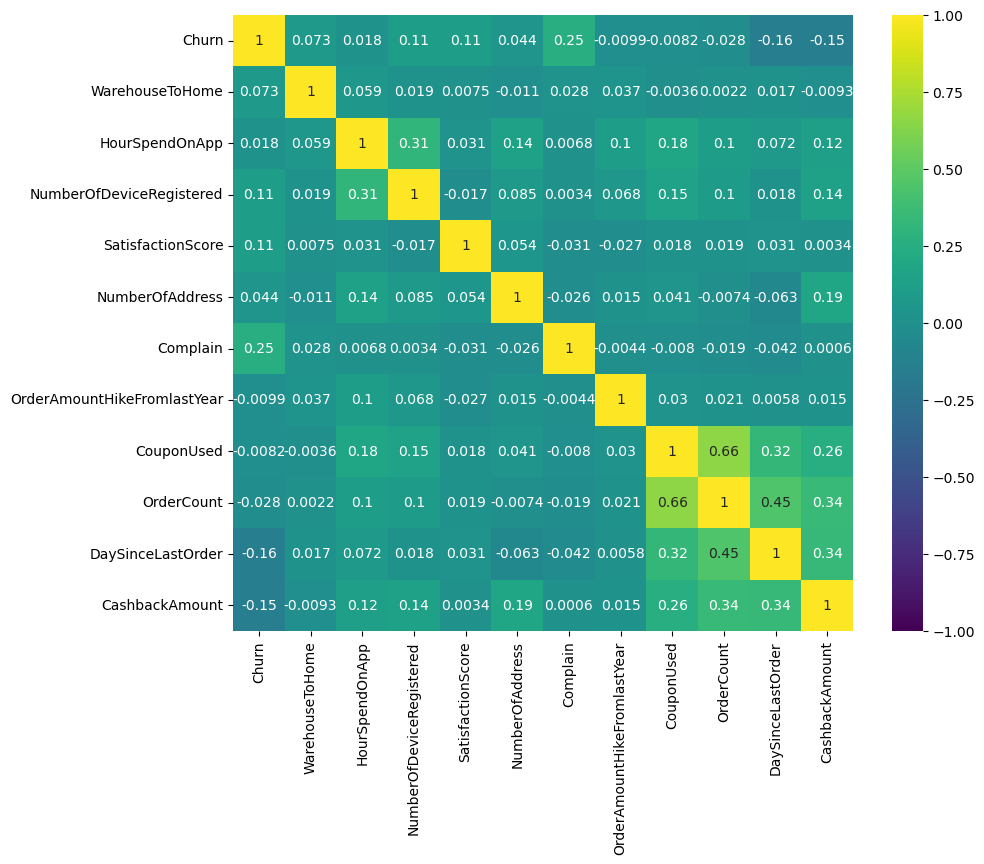

In [33]:
plt.figure(figsize=(10, 8))
sns.heatmap(user_app_df.corr(), vmax=1, vmin=-1,cmap='viridis', annot=True)
plt.show()

### Observations:
Based on the heatmap analysis, it has been observed that none of the features in the dataset exhibit high correlation with one another. Hence, there is no need to remove any features due to high correlation, and all the features can be retained for further analysis.

In [34]:
churn_distribution = user_app_df['Churn'].value_counts(normalize=True)

print(churn_distribution)

0    0.831616
1    0.168384
Name: Churn, dtype: float64


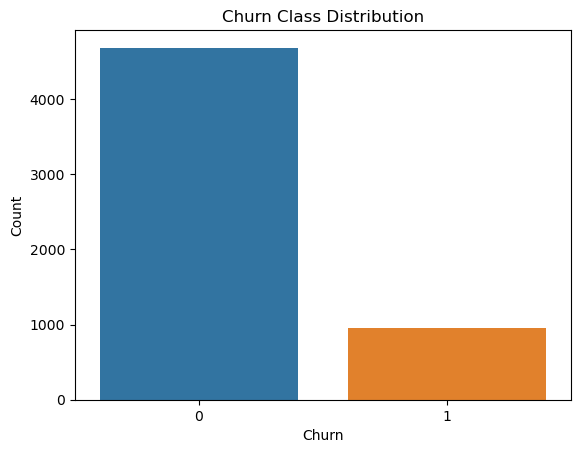

In [35]:
sns.countplot(x='Churn', data=user_app_df)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Churn Class Distribution')
plt.show()

In [36]:
print('Churn Rate : {0}%'.format(round(((sum(user_app_df['Churn'])/len(user_app_df['Churn']))*100),2)))

Churn Rate : 16.84%


Churn rate is 16.84% of the overall data available. This indicates that we would need to handle the class imbalance in this classification problem.

In [37]:
##Creating an alternate copy of 'user_app_df' dataframe 
user_app_df_1= user_app_df.copy()

In [38]:
##Rewriting original dataframe 'user_app_df_1'
user_app_df= user_app_df_1.copy()

### Dummy Variable Creation

In [39]:
# Creating dummies for categorical variables
cat_cols= ['Tenure','PreferredLoginDevice','PreferredPaymentMode','MaritalStatus', 'Gender','PreferedOrderCat','CityTier']
dummy_data = pd.get_dummies(user_app_df[cat_cols], prefix=cat_cols, drop_first = True)
user_app_df = pd.concat([user_app_df, dummy_data], axis = 1)

##Dropping the categorical variables column
user_app_df.drop(cat_cols, axis=1, inplace=True)

In [40]:
user_app_df.head()

,Churn,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,MaritalStatus_Married,MaritalStatus_Single,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,CityTier_2,CityTier_3
0,1,6.0,3.000000,3,2,9,1,11.0,1.0,1.0,...,0,1,0,0,1,0,0,0,0,1
1,1,8.0,3.000000,4,3,7,1,15.0,0.0,1.0,...,0,1,1,0,0,1,0,0,0,0
2,1,30.0,2.000000,4,3,6,1,14.0,0.0,1.0,...,0,1,1,0,0,1,0,0,0,0
3,1,15.0,2.000000,4,5,8,0,23.0,0.0,1.0,...,0,1,1,0,1,0,0,0,0,1
4,1,12.0,2.931535,3,5,3,0,11.0,1.0,1.0,...,0,1,1,0,0,1,0,0,0,0


In [41]:
# Creating a function to find binary value columns from the 'tele_churn_data_1' dataframe.
def binary_value_cols(dataframe):
    dataframe_1 = dataframe.copy()
    binarycolumn = (dataframe_1.nunique()==2)
    list_binarycolumn = list(binarycolumn [binarycolumn .values==True].index)
    return list_binarycolumn

binary_cols_list =  binary_value_cols(dataframe= user_app_df)
print(binary_cols_list)

['Churn', 'Complain', 'Tenure_1_2_Yr', 'Tenure_2_4_Yr', 'Tenure_4_5_Yr', 'Tenure_5_6_Yr', 'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone', 'PreferredPaymentMode_COD', 'PreferredPaymentMode_Cash on Delivery', 'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card', 'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI', 'MaritalStatus_Married', 'MaritalStatus_Single', 'Gender_Male', 'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others', 'CityTier_2', 'CityTier_3']


## Step 5: Test-Train Split and Feature scaling

In [42]:
# divide data into train and test
##split into train and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(user_app_df, train_size=0.7, test_size = 0.3, random_state=42)

In [43]:
# Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols_list]
df_binary_test =df_test.loc[:, binary_cols_list]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop( binary_cols_list, axis=1)
df_test = df_test.drop( binary_cols_list, axis=1)

##StandardScaler
from sklearn.preprocessing import StandardScaler
all_colms = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_colms] = scaler.fit_transform(df_train[all_colms])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_colms] = scaler.transform(df_test[all_colms])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [44]:
print(df_train.shape)
print(df_test.shape)

(3940, 34)
(1689, 34)


In [45]:
##Scaled train-data
df_train.head()

,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,...,MaritalStatus_Married,MaritalStatus_Single,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,CityTier_2,CityTier_3
1559,-0.003330,-1.329618,-0.676128,1.406929,0.703823,-1.313168,-0.952734,-0.702488,-0.144016,-1.026007,...,0,1,0,0,0,1,0,0,0,0
993,-0.789668,-1.329618,-0.676128,-1.495702,-0.852765,1.462333,-0.415862,-0.702488,-1.269875,-1.149254,...,1,0,0,0,0,1,0,0,0,0
1187,0.986726,-0.006023,-2.628450,1.406929,-1.241912,0.352132,-0.415862,-0.702488,-1.269875,-0.964383,...,1,0,1,0,0,1,0,0,1,0
188,-0.552816,0.091257,-0.676128,0.681271,1.092970,-1.313168,0.121011,1.707447,0.008958,0.863784,...,0,0,0,0,0,0,0,0,0,0
4630,1.815709,0.091257,0.300033,-1.495702,-0.852765,-0.480518,0.121011,-0.013935,-0.706945,-0.574101,...,1,0,1,0,0,0,1,0,0,1


In [46]:
##Storing target variable to y_train and y_test respectively
y_train = df_train['Churn'].reset_index(drop=True)
y_test = df_test['Churn'].reset_index(drop=True)

##Storing all feature variables to X_train and X_test
X_train = df_train.drop('Churn',axis=1).reset_index(drop=True)
X_test = df_test.drop('Churn',axis=1).reset_index(drop=True)

In [47]:
##Dealing with class imbalance 
y= user_app_df_1['Churn']
print("Before Resampling, counts of label '1'(train_set): {}".format(sum(y_train==1)))
print("Before Resampling, counts of label '0'(train_set): {} \n".format(sum(y_train==0)))
print("Before Resampling, churn event rate (Entire Dataset): {}% \n".format(round(sum(y==1)/len(y)*100,3)))

Before Resampling, counts of label '1'(train_set): 672
Before Resampling, counts of label '0'(train_set): 3268 

Before Resampling, churn event rate (Entire Dataset): 16.838% 



In [48]:
# let's build the logistic regression base model and check for stats (on unbalanced class dataset)

from collections import Counter
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# logistic regression object 
from sklearn.linear_model import LogisticRegression
log_mod = LogisticRegression() 
  
# train the model on train set 
log_mod.fit(X_train, y_train.ravel()) 
predict_train = log_mod.predict(X_train)

  
# predictions and print classification report  for test data
y_pred = log_mod.predict(X_test)


print ('Accuracy: ', accuracy_score(y_test, y_pred))
print ('F1 score: ', f1_score(y_test, y_pred))
print ('Recall: ', recall_score(y_test, y_pred))
print ('Precision: ', precision_score(y_test, y_pred))
print ('\n clasification report:\n', classification_report(y_test,y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy:  0.8762581409117821
F1 score:  0.5011933174224343
Recall:  0.38181818181818183
Precision:  0.7291666666666666

 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1414
           1       0.73      0.38      0.50       275

    accuracy                           0.88      1689
   macro avg       0.81      0.68      0.72      1689
weighted avg       0.86      0.88      0.86      1689


 confussion matrix:
 [[1375   39]
 [ 170  105]]


### Observations:
i.  The accuracy is around 87 % but it doesn't conludes as a good evaluation metric as the classes are imbalanced in the 
    dataset.   
ii. The recall of Churned (Sensitivity) is 0.38 low and the recall of Not Churned i.e.(Specificity) is high 0.97.This is not     desired since we need to reduce the False Negatives.  
iii.F1 score for Churned is 0.50 which is very low.  
vi. For better prediction of Churned, the sensitivity has to be high,Specificity (recall for Not Churned) has to be low and F1 score should be higher.  
v. In this problem we will use F1 score as evaluation metric for model because high F1 score means it is effective at correctly    classifying both positive and negative instances in the dataset.  

## Step 6: Handling Imbalanced Dataset

#### We can handle imbalanced classes by balancing the classes by increasing minority or decreasing majority.

We can do that by following few techniques
1. Random Under-Sampling
2. Random Over-Sampling
3. SMOTE - Synthetic Minority Oversampling Technique
4. ADASYN - Adaptive Synthetic Sampling Method
5. SMOTETomek - Over-sampling followed by under-sampling
6. Tomek Links

### Using logistic Regression

In [49]:
##SMOTETomek' (SMOTE and Tomek links hybrid technique) to deal with the class imbalance

from imblearn.combine import SMOTETomek
smote_tomek = SMOTETomek(random_state=42)
X_resampled_smt_tmk, y_resampled_smt_tmk= smote_tomek.fit_resample(X_train, y_train)

In [50]:
print(sorted(Counter(y_resampled_smt_tmk).items()))

[(0, 3268), (1, 3268)]


In [51]:
lreg_smt_tmk = LogisticRegression()
lreg_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_smt_tmk = lreg_smt_tmk.predict(X_test)

In [52]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt_tmk))

Accuracy:  0.8004736530491415
F1 score:  0.5464333781965007
Recall:  0.7381818181818182
Precision:  0.4337606837606838

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      1414
           1       0.43      0.74      0.55       275

    accuracy                           0.80      1689
   macro avg       0.69      0.78      0.71      1689
weighted avg       0.86      0.80      0.82      1689


 confussion matrix:
 [[1149  265]
 [  72  203]]


In [53]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

1344

In [54]:
print(sorted(Counter(y_resampled_us).items()))

[(0, 672), (1, 672)]


In [55]:
lreg_us = LogisticRegression()
lreg_us.fit(X_resampled_us, y_resampled_us)

y_pred_us = lreg_us.predict(X_test)

In [56]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_us))
print ('F1 score: ', f1_score(y_test, y_pred_us))
print ('Recall: ', recall_score(y_test, y_pred_us))
print ('Precision: ', precision_score(y_test, y_pred_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_us))

Accuracy:  0.7738306690349319
F1 score:  0.5419664268585132
Recall:  0.8218181818181818
Precision:  0.40429338103756707

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.76      0.85      1414
           1       0.40      0.82      0.54       275

    accuracy                           0.77      1689
   macro avg       0.68      0.79      0.70      1689
weighted avg       0.87      0.77      0.80      1689


 confussion matrix:
 [[1081  333]
 [  49  226]]


In [57]:
# Tomek Links
from imblearn.under_sampling import TomekLinks
tomek_sample = TomekLinks(sampling_strategy='majority')
X_resampled_tomek, y_resampled_tomek = tomek_sample.fit_resample(X_train, y_train)
len(X_resampled_tomek)

3922

In [58]:
print(sorted(Counter(y_resampled_tomek).items()))

[(0, 3250), (1, 672)]


In [59]:
lreg_tomek = LogisticRegression()
lreg_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_tomek = lreg_tomek.predict(X_test)

In [60]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_tomek))
print ('Recall: ', recall_score(y_test, y_pred_tomek))
print ('Precision: ', precision_score(y_test, y_pred_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_tomek))

Accuracy:  0.8756660746003553
F1 score:  0.5000000000000001
Recall:  0.38181818181818183
Precision:  0.7241379310344828

 clasification report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1414
           1       0.72      0.38      0.50       275

    accuracy                           0.88      1689
   macro avg       0.81      0.68      0.71      1689
weighted avg       0.86      0.88      0.86      1689


 confussion matrix:
 [[1374   40]
 [ 170  105]]


In [61]:
# Random OverSampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

6536

In [62]:
print(sorted(Counter(y_resampled_os).items()))

[(0, 3268), (1, 3268)]


In [63]:
lreg_os = LogisticRegression()
lreg_os.fit(X_resampled_os, y_resampled_os)

y_pred_os = lreg_os.predict(X_test)

In [64]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_os))
print ('F1 score: ', f1_score(y_test, y_pred_os))
print ('Recall: ', recall_score(y_test, y_pred_os))
print ('Precision: ', precision_score(y_test, y_pred_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_os))

Accuracy:  0.7892243931320307
F1 score:  0.5572139303482587
Recall:  0.8145454545454546
Precision:  0.42344045368620037

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.78      0.86      1414
           1       0.42      0.81      0.56       275

    accuracy                           0.79      1689
   macro avg       0.69      0.80      0.71      1689
weighted avg       0.87      0.79      0.81      1689


 confussion matrix:
 [[1109  305]
 [  51  224]]


In [65]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

6536

In [66]:
print(sorted(Counter(y_resampled_smt).items()))

[(0, 3268), (1, 3268)]


In [67]:
lreg_smt = LogisticRegression()
lreg_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_smt = lreg_smt.predict(X_test)

In [68]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_smt))
print ('F1 score: ', f1_score(y_test, y_pred_smt))
print ('Recall: ', recall_score(y_test, y_pred_smt))
print ('Precision: ', precision_score(y_test, y_pred_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_smt))

Accuracy:  0.7969212551805802
F1 score:  0.5320600272851296
Recall:  0.7090909090909091
Precision:  0.425764192139738

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      1414
           1       0.43      0.71      0.53       275

    accuracy                           0.80      1689
   macro avg       0.68      0.76      0.70      1689
weighted avg       0.85      0.80      0.82      1689


 confussion matrix:
 [[1151  263]
 [  80  195]]


In [69]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

6448

In [70]:
lreg_ada = LogisticRegression()
lreg_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_ada = lreg_ada.predict(X_test)

In [71]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_ada))
print ('F1 score: ', f1_score(y_test, y_pred_ada))
print ('Recall: ', recall_score(y_test, y_pred_ada))
print ('Precision: ', precision_score(y_test, y_pred_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_ada))

Accuracy:  0.7927767910005921
F1 score:  0.5295698924731183
Recall:  0.7163636363636363
Precision:  0.4200426439232409

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.81      0.87      1414
           1       0.42      0.72      0.53       275

    accuracy                           0.79      1689
   macro avg       0.68      0.76      0.70      1689
weighted avg       0.85      0.79      0.81      1689


 confussion matrix:
 [[1142  272]
 [  78  197]]


### Using Decision Trees

In [72]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train, df_test = train_test_split(user_app_df, train_size=0.7, test_size = 0.3, random_state=42)

In [73]:
# Dataframe with binary columns
df_binary_train = df_train.loc[:, binary_cols_list]
df_binary_test =df_test.loc[:, binary_cols_list]

##Dropping binary dummy variables and we shall concat them later to preserve the scale
df_train = df_train.drop( binary_cols_list, axis=1)
df_test = df_test.drop( binary_cols_list, axis=1)

##StandardScaler
from sklearn.preprocessing import StandardScaler
all_colms = df_train.columns
scaler = StandardScaler()

#scaler fit_transform on train data
df_train[all_colms] = scaler.fit_transform(df_train[all_colms])
#concat dummies:Train set
df_train = pd.concat([df_train, df_binary_train], axis=1)

#scaler transform on test data
df_test[all_colms] = scaler.transform(df_test[all_colms])
#concat dummies: Test set
df_test = pd.concat([df_test, df_binary_test], axis=1)

In [74]:
print(df_train.shape)
print(df_test.shape)

(3940, 34)
(1689, 34)


In [75]:
##Storing target variable to y_train and y_test respectively
y_train = df_train['Churn'].reset_index(drop=True)
y_test = df_test['Churn'].reset_index(drop=True)

##Storing all feature variables to X_train and X_test
X_train = df_train.drop('Churn',axis=1).reset_index(drop=True)
X_test = df_test.drop('Churn',axis=1).reset_index(drop=True)

In [76]:
# Decision Trees - Base
from sklearn.tree import DecisionTreeClassifier
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [77]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [78]:
y_pred_rf = dt_base.predict(X_test)

In [79]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.8543516873889876
F1 score:  0.4484304932735426
Recall:  0.36363636363636365
Precision:  0.5847953216374269

 clasification report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.92      1414
           1       0.58      0.36      0.45       275

    accuracy                           0.85      1689
   macro avg       0.73      0.66      0.68      1689
weighted avg       0.84      0.85      0.84      1689


 confussion matrix:
 [[1343   71]
 [ 175  100]]


In [80]:
# SMOTE+TOMEK
from sklearn.tree import DecisionTreeClassifier
dtc_smt_tmk = DecisionTreeClassifier(random_state=0)
dtc_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_dtc_smt_tmk = dtc_smt_tmk.predict(X_test)

In [81]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt_tmk))

Accuracy:  0.8756660746003553
F1 score:  0.6428571428571428
Recall:  0.6872727272727273
Precision:  0.6038338658146964

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      1414
           1       0.60      0.69      0.64       275

    accuracy                           0.88      1689
   macro avg       0.77      0.80      0.78      1689
weighted avg       0.88      0.88      0.88      1689


 confussion matrix:
 [[1290  124]
 [  86  189]]


In [82]:
# ADASYN
from imblearn.over_sampling import ADASYN
ada = ADASYN(random_state=45, n_neighbors=5)
X_resampled_ada, y_resampled_ada = ada.fit_resample(X_train, y_train)
len(X_resampled_ada)

6448

In [83]:
# Decision Trees - ADASYN
from sklearn.tree import DecisionTreeClassifier
dtc_ada = DecisionTreeClassifier(random_state=0)
dtc_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_dtc_ada = dtc_ada.predict(X_test)

In [84]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_ada))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_ada))
print ('Recall: ', recall_score(y_test, y_pred_dtc_ada))
print ('Precision: ', precision_score(y_test, y_pred_dtc_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_ada))

Accuracy:  0.8809946714031972
F1 score:  0.6621848739495797
Recall:  0.7163636363636363
Precision:  0.615625

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      1414
           1       0.62      0.72      0.66       275

    accuracy                           0.88      1689
   macro avg       0.78      0.81      0.79      1689
weighted avg       0.89      0.88      0.88      1689


 confussion matrix:
 [[1291  123]
 [  78  197]]


In [85]:
# Random Undersampling
from imblearn.under_sampling import RandomUnderSampler
under_sample = RandomUnderSampler(random_state = 5)
X_resampled_us, y_resampled_us = under_sample.fit_resample(X_train, y_train)
len(X_resampled_us)

1344

In [86]:
# Decision Trees - Random UnderSampling
from sklearn.tree import DecisionTreeClassifier
dtc_us = DecisionTreeClassifier(random_state=0)
dtc_us.fit(X_resampled_us, y_resampled_us)

y_pred_dtc_us = dtc_us.predict(X_test)

In [87]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_us))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_us))
print ('Recall: ', recall_score(y_test, y_pred_dtc_us))
print ('Precision: ', precision_score(y_test, y_pred_dtc_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_us))

Accuracy:  0.7756068679692125
F1 score:  0.5482717520858164
Recall:  0.8363636363636363
Precision:  0.4078014184397163

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.76      0.85      1414
           1       0.41      0.84      0.55       275

    accuracy                           0.78      1689
   macro avg       0.68      0.80      0.70      1689
weighted avg       0.87      0.78      0.80      1689


 confussion matrix:
 [[1080  334]
 [  45  230]]


In [88]:
# Tomek Links
from imblearn.under_sampling import TomekLinks
tomek_sample = TomekLinks(sampling_strategy='majority')
X_resampled_tomek, y_resampled_tomek = tomek_sample.fit_resample(X_train, y_train)
len(X_resampled_tomek)

3922

In [89]:
# Decision Trees - Tomek Links
from sklearn.tree import DecisionTreeClassifier
dtc_tomek = DecisionTreeClassifier(random_state=0)
dtc_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_dtc_tomek = dtc_tomek.predict(X_test)

In [90]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_tomek))
print ('Recall: ', recall_score(y_test, y_pred_dtc_tomek))
print ('Precision: ', precision_score(y_test, y_pred_dtc_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_tomek))

Accuracy:  0.9295441089402013
F1 score:  0.7930434782608696
Recall:  0.8290909090909091
Precision:  0.76

 clasification report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      1414
           1       0.76      0.83      0.79       275

    accuracy                           0.93      1689
   macro avg       0.86      0.89      0.88      1689
weighted avg       0.93      0.93      0.93      1689


 confussion matrix:
 [[1342   72]
 [  47  228]]


In [91]:
# Random OverSampling
from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)
len(X_resampled_os)

6536

In [92]:
# Decision Trees - Random Over-Sampling
from sklearn.tree import DecisionTreeClassifier
dtc_os = DecisionTreeClassifier(random_state=0)
dtc_os.fit(X_resampled_os, y_resampled_os)

y_pred_dtc_os = dtc_os.predict(X_test)

In [93]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_os))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_os))
print ('Recall: ', recall_score(y_test, y_pred_dtc_os))
print ('Precision: ', precision_score(y_test, y_pred_dtc_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_os))

Accuracy:  0.9200710479573713
F1 score:  0.7619047619047618
Recall:  0.7854545454545454
Precision:  0.7397260273972602

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1414
           1       0.74      0.79      0.76       275

    accuracy                           0.92      1689
   macro avg       0.85      0.87      0.86      1689
weighted avg       0.92      0.92      0.92      1689


 confussion matrix:
 [[1338   76]
 [  59  216]]


In [94]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_resampled_smt, y_resampled_smt = smt.fit_resample(X_train, y_train)
len(X_resampled_smt)

6536

In [95]:
# Decision Trees - SMOTE
from sklearn.tree import DecisionTreeClassifier
dtc_smt = DecisionTreeClassifier(random_state=0)
dtc_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_dtc_smt = dtc_smt.predict(X_test)

In [96]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_dtc_smt))
print ('F1 score: ', f1_score(y_test, y_pred_dtc_smt))
print ('Recall: ', recall_score(y_test, y_pred_dtc_smt))
print ('Precision: ', precision_score(y_test, y_pred_dtc_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_dtc_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_dtc_smt))

Accuracy:  0.8768502072232089
F1 score:  0.6521739130434783
Recall:  0.7090909090909091
Precision:  0.6037151702786377

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      1414
           1       0.60      0.71      0.65       275

    accuracy                           0.88      1689
   macro avg       0.77      0.81      0.79      1689
weighted avg       0.89      0.88      0.88      1689


 confussion matrix:
 [[1286  128]
 [  80  195]]


### Using Random Forest

In [97]:
# Random Forest - Base
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

In [98]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf))
print ('F1 score: ', f1_score(y_test, y_pred_rf))
print ('Recall: ', recall_score(y_test, y_pred_rf))
print ('Precision: ', precision_score(y_test, y_pred_rf))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf))

Accuracy:  0.9431616341030196
F1 score:  0.7966101694915253
Recall:  0.6836363636363636
Precision:  0.9543147208121827

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      1414
           1       0.95      0.68      0.80       275

    accuracy                           0.94      1689
   macro avg       0.95      0.84      0.88      1689
weighted avg       0.94      0.94      0.94      1689


 confussion matrix:
 [[1405    9]
 [  87  188]]


In [99]:
# Random Forest - Random UnderSampling
rf_us = RandomForestClassifier(random_state=42)
rf_us.fit(X_resampled_us, y_resampled_us)

y_pred_rf_us = rf_us.predict(X_test)

In [100]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_us))
print ('F1 score: ', f1_score(y_test, y_pred_rf_us))
print ('Recall: ', recall_score(y_test, y_pred_rf_us))
print ('Precision: ', precision_score(y_test, y_pred_rf_us))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_us))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_us))

Accuracy:  0.866785079928952
F1 score:  0.6887966804979252
Recall:  0.9054545454545454
Precision:  0.5558035714285714

 clasification report:
               precision    recall  f1-score   support

           0       0.98      0.86      0.92      1414
           1       0.56      0.91      0.69       275

    accuracy                           0.87      1689
   macro avg       0.77      0.88      0.80      1689
weighted avg       0.91      0.87      0.88      1689


 confussion matrix:
 [[1215  199]
 [  26  249]]


In [101]:
# Random Forest - Tomek Links
rf_tomek = RandomForestClassifier(random_state=42)
rf_tomek.fit(X_resampled_tomek, y_resampled_tomek)

y_pred_rf_tomek = rf_tomek.predict(X_test)

In [102]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_tomek))
print ('F1 score: ', f1_score(y_test, y_pred_rf_tomek))
print ('Recall: ', recall_score(y_test, y_pred_rf_tomek))
print ('Precision: ', precision_score(y_test, y_pred_rf_tomek))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_tomek))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_tomek))

Accuracy:  0.9461219656601539
F1 score:  0.8100208768267223
Recall:  0.7054545454545454
Precision:  0.9509803921568627

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97      1414
           1       0.95      0.71      0.81       275

    accuracy                           0.95      1689
   macro avg       0.95      0.85      0.89      1689
weighted avg       0.95      0.95      0.94      1689


 confussion matrix:
 [[1404   10]
 [  81  194]]


In [103]:
# Random Forest - Random Over-Sampling
rf_os = RandomForestClassifier(random_state=42)
over_sample = RandomOverSampler(sampling_strategy = 1)
rf_os.fit(X_resampled_os, y_resampled_os)

y_pred_rf_os = rf_os.predict(X_test)

In [104]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_os))
print ('F1 score: ', f1_score(y_test, y_pred_rf_os))
print ('Recall: ', recall_score(y_test, y_pred_rf_os))
print ('Precision: ', precision_score(y_test, y_pred_rf_os))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_os))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_os))

Accuracy:  0.9573712255772646
F1 score:  0.856
Recall:  0.7781818181818182
Precision:  0.9511111111111111

 clasification report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1414
           1       0.95      0.78      0.86       275

    accuracy                           0.96      1689
   macro avg       0.95      0.89      0.92      1689
weighted avg       0.96      0.96      0.96      1689


 confussion matrix:
 [[1403   11]
 [  61  214]]


In [105]:
# Random Forest - SMOTE
rf_smt = RandomForestClassifier(random_state=42)
rf_smt.fit(X_resampled_smt, y_resampled_smt)

y_pred_rf_smt = rf_smt.predict(X_test)

In [106]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt))

Accuracy:  0.9354647720544701
F1 score:  0.7850098619329388
Recall:  0.7236363636363636
Precision:  0.8577586206896551

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1414
           1       0.86      0.72      0.79       275

    accuracy                           0.94      1689
   macro avg       0.90      0.85      0.87      1689
weighted avg       0.93      0.94      0.93      1689


 confussion matrix:
 [[1381   33]
 [  76  199]]


In [107]:
# Random Forest - ADASYN
rf_ada = RandomForestClassifier(random_state=42)
rf_ada.fit(X_resampled_ada, y_resampled_ada)

y_pred_rf_ada = rf_ada.predict(X_test)

In [108]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_ada))
print ('F1 score: ', f1_score(y_test, y_pred_rf_ada))
print ('Recall: ', recall_score(y_test, y_pred_rf_ada))
print ('Precision: ', precision_score(y_test, y_pred_rf_ada))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_ada))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_ada))

Accuracy:  0.9372409709887507
F1 score:  0.7862903225806451
Recall:  0.7090909090909091
Precision:  0.8823529411764706

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1414
           1       0.88      0.71      0.79       275

    accuracy                           0.94      1689
   macro avg       0.91      0.85      0.87      1689
weighted avg       0.94      0.94      0.93      1689


 confussion matrix:
 [[1388   26]
 [  80  195]]


In [109]:
# Random Forest - SMOTE+TOMEK
rf_smt_tmk = RandomForestClassifier(random_state=42)
rf_smt_tmk.fit(X_resampled_smt_tmk, y_resampled_smt_tmk)

y_pred_rf_smt_tmk = rf_smt_tmk.predict(X_test)

In [110]:
print ('Accuracy: ', accuracy_score(y_test, y_pred_rf_smt_tmk))
print ('F1 score: ', f1_score(y_test, y_pred_rf_smt_tmk))
print ('Recall: ', recall_score(y_test, y_pred_rf_smt_tmk))
print ('Precision: ', precision_score(y_test, y_pred_rf_smt_tmk))
print ('\n clasification report:\n', classification_report(y_test,y_pred_rf_smt_tmk))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred_rf_smt_tmk))

Accuracy:  0.9372409709887507
F1 score:  0.7896825396825398
Recall:  0.7236363636363636
Precision:  0.868995633187773

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      1414
           1       0.87      0.72      0.79       275

    accuracy                           0.94      1689
   macro avg       0.91      0.85      0.88      1689
weighted avg       0.94      0.94      0.93      1689


 confussion matrix:
 [[1384   30]
 [  76  199]]


#### As we can see from above resampling techniques that, F1 score using Random Forest- Random oversampling technique  is 0.86.
#### We will pick up 'Random Forest- Random oversampling technique' method.

## Step 7: Model Building 

In [111]:
##Implementing 'Random OverSampling' technique to deal with the class imbalance

from imblearn.over_sampling import RandomOverSampler
over_sample = RandomOverSampler(sampling_strategy = 1)
X_resampled_os, y_resampled_os = over_sample.fit_resample(X_train, y_train)

print('After Random overersampling, the shape of train_X: {}'.format(X_resampled_os.shape))
print('After Random overersampling, the shape of train_y: {} \n'.format(y_resampled_os.shape))

print("After Random overersampling, counts of label '1': {}".format(sum(y_resampled_os==1)))
print("After Random overersampling, counts of label '0': {}".format(sum(y_resampled_os==0)))
print("After Random overersampling, churn event rate : {}% \n".format(round(sum(y_resampled_os==1)/len(y_resampled_os)*100,2)))

After Random overersampling, the shape of train_X: (6536, 33)
After Random overersampling, the shape of train_y: (6536,) 

After Random overersampling, counts of label '1': 3268
After Random overersampling, counts of label '0': 3268
After Random overersampling, churn event rate : 50.0% 



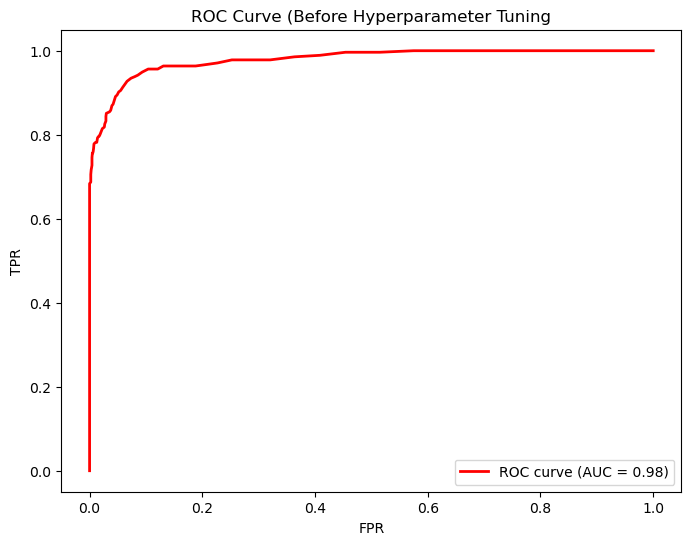

In [112]:
# ROC curve for the model before hyperparameter tuning

from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
y_pred_proba_rf_os = rf_os.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr_rf_os, tpr_rf_os, thresholds_rf_os = roc_curve(y_test, y_pred_proba_rf_os)

# Calculate ROC AUC score
roc_auc_rf_os = roc_auc_score(y_test, y_pred_proba_rf_os)

# Plot the ROC curve for the model before hyperparameter tuning
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_os, tpr_rf_os, color='r', lw=2, label=f'ROC curve (AUC = {roc_auc_rf_os:.2f})')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.title('ROC Curve (Before Hyperparameter Tuning')
plt.show()

### Hyperparameter Tuning:

In [113]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [114]:
# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a scorer for Grid Search (F1-score as the scoring metric)
scorer = make_scorer(f1_score)

In [115]:
# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scorer)
grid_search.fit(X_resampled_os, y_resampled_os)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(f1_score))

In [116]:
# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [117]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Make predictions using the best model on the training data
y_train_pred = best_rf_model.predict(X_resampled_os)

# Calculate accuracy, recall, precision, and F1 score on the training data
accuracy = accuracy_score(y_resampled_os, y_train_pred)
recall = recall_score(y_resampled_os, y_train_pred)
precision = precision_score(y_resampled_os, y_train_pred)
f1 = f1_score(y_resampled_os, y_train_pred)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 1.0
Recall: 1.0
Precision: 1.0
F1 Score: 1.0


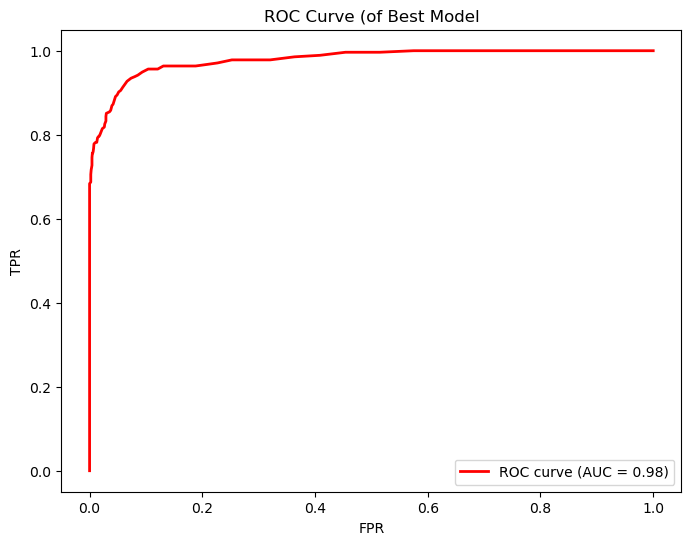

In [118]:
# Get predicted probabilities for the positive class
y_pred_proba = best_rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf_os, tpr_rf_os, color='r', lw=2, label=f'ROC curve (AUC = {roc_auc_rf_os:.2f})')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.title('ROC Curve (of Best Model')
plt.show()

In [119]:
# Evaluate the best model on the test set
y_pred_best = best_rf_model.predict(X_test)

In [120]:
# Calculate evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best)
recall_best = recall_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best)

print('Accuracy (Best Model):', accuracy_best)
print('F1 score (Best Model):', f1_best)
print('Recall (Best Model):', recall_best)
print('Precision (Best Model):', precision_best)

Accuracy (Best Model): 0.9514505624629959
F1 score (Best Model): 0.836
Recall (Best Model): 0.76
Precision (Best Model): 0.9288888888888889


In [121]:
best_rf_model.feature_importances_

array([8.73060271e-02, 2.10835964e-02, 3.87148019e-02, 5.89274305e-02,
       6.65481415e-02, 6.81087231e-02, 2.90644333e-02, 3.94508067e-02,
       7.55702516e-02, 9.57002014e-02, 7.86265574e-02, 4.75373986e-02,
       3.19202224e-02, 1.83019659e-05, 1.46958319e-05, 1.73425505e-02,
       1.03649800e-02, 1.10305101e-02, 4.21125665e-03, 1.66765208e-02,
       1.67186493e-02, 1.03649750e-02, 8.44546902e-03, 1.71638755e-02,
       3.71253091e-02, 2.23729041e-02, 4.01943966e-03, 2.34328370e-02,
       7.99369016e-03, 1.76878631e-02, 3.20368332e-03, 5.58730906e-03,
       2.76665879e-02])

In [122]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": best_rf_model.feature_importances_
})

In [123]:
top_10 = imp_df.sort_values(by="Imp", ascending=False).head(10)
print(top_10)

                        Varname       Imp
9                CashbackAmount  0.095700
0               WarehouseToHome  0.087306
10                     Complain  0.078627
8             DaySinceLastOrder  0.075570
5   OrderAmountHikeFromlastYear  0.068109
4               NumberOfAddress  0.066548
3             SatisfactionScore  0.058927
11                Tenure_1_2_Yr  0.047537
7                    OrderCount  0.039451
2      NumberOfDeviceRegistered  0.038715


### Recommendations:
i. CashbackAmount:The "CashbackAmount" feature is the most important feature in predicting the target variable. Paying attention to cashback offers and optimizing this aspect could significantly impact the target variable.

ii.WarehouseToHome:Improving the efficiency and reliability of warehouse-to-home deliveries can have a substantial impact on the model's predictions.

iii.Complain: Addressing customer complaints promptly and effectively can help improve the target variable's overall performance.

iv.DaySinceLastOrder:It implies that customer engagement and activity (e.g., frequency of orders) are critical aspects to monitor and optimize.

v. OrderAmountHikeFromlastYear:Understanding and managing changes in order amounts compared to the previous year can lead to valuable insights for the target variable.

vi.NumberOfAddress: The number of addresses associated with a customer might provide valuable information for the target variable's predictions.

vii.SatisfactionScore: Improving customer satisfaction can positively impact the predictions.

viii.Tenure_1_2_Yr: The tenure of customers between 1 and 2 years can provide useful insights into the target variable.

ix.NumberOfDeviceRegistered: The number of devices registered by customers might be relevant for predicting the target variable.

x.OrderCount: The frequency of orders might have some impact on the target variable.


### *Model summary*

#### Train set     
Accuracy : 1.0                             
F1 score : 1.0                           
Recall   : 1.0                          
Precision : 1.0                         

#### Test set      
Accuracy : 0.95               
F1 score : 0.84           
Recall : 0.76           
Precision : 0.93       
